<a href="https://colab.research.google.com/github/sarajay19/T5_W2/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [241]:
df = pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [243]:
df.shape

(12316, 32)

In [244]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [245]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [246]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2165,21:45:00,Wednesday,Unknown,Male,Junior high school,Employee,5-10yr,Automobile,Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
10182,14:40:00,Saturday,Unknown,Female,NaN,NaN,NaN,NaN,Owner,1-2yr,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
8289,13:53:00,Saturday,18-30,Male,Junior high school,Owner,Below 1yr,Public (13?45 seats),Governmental,NaN,...,NaN,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
6101,13:49:00,Monday,Over 51,Male,Elementary school,Employee,5-10yr,Other,Owner,NaN,...,Reversing,Driver or rider,Male,18-30,3,Other,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
12124,17:10:00,Tuesday,31-50,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to vehicle,Serious Injury
12158,16:53:00,Wednesday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,NaN,...,Reversing,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
12301,17:25:00,Friday,31-50,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,1-2yr,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Serious Injury
4178,14:25:00,Friday,Unknown,Female,Junior high school,Employee,2-5yr,Other,Owner,NaN,...,Other,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
8150,10:00:00,Friday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,NaN,...,Turnover,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury
9379,17:51:00,Monday,18-30,Male,NaN,Employee,unknown,Lorry (41?100Q),Owner,Below 1yr,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury


In [247]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [248]:
df.duplicated().sum()

0

In [249]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [250]:
df['Educational_level'].mode()

,Educational_level
0,Junior high school


In [251]:
df['Educational_level'].fillna('Junior high school', inplace=True)

In [252]:
df['Vehicle_driver_relation'].mode()

,Vehicle_driver_relation
0,Employee


In [253]:
df['Vehicle_driver_relation'].fillna('Employee', inplace=True)

In [254]:
df[['Driving_experience','Type_of_vehicle','Owner_of_vehicle', 'Service_year_of_vehicle','Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']].mode()

,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Type_of_collision,Vehicle_movement,Work_of_casuality,Fitness_of_casuality
0,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Vehicle with vehicle collision,Going straight,Driver,Normal


In [255]:
df['Driving_experience'].fillna('5-10yr', inplace=True)
df['Type_of_vehicle'].fillna('Automobile', inplace=True)
df['Owner_of_vehicle'].fillna('Owner', inplace=True)
df['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
df['Defect_of_vehicle'].fillna('No defect', inplace=True)
df['Area_accident_occured'].fillna('Other', inplace=True)
df['Lanes_or_Medians'].fillna('Two-way (divided with broken lines road marking)', inplace=True)
df['Road_allignment'].fillna('Tangent road with flat terrain', inplace=True)
df['Types_of_Junction'].fillna('Y Shape', inplace=True)
df['Road_surface_type'].fillna('Asphalt roads', inplace=True)
df['Type_of_collision'].fillna('Vehicle with vehicle collision', inplace=True)
df['Vehicle_movement'].fillna('Going straight', inplace=True)
df['Work_of_casuality'].fillna('Driver', inplace=True)
df['Fitness_of_casuality'].fillna('Normal', inplace=True)

In [256]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [257]:
df['Casualty_severity'].mode()

,Casualty_severity
0,3


In [265]:
 df['Casualty_severity']= df['Casualty_severity'].apply(lambda x: str(x).replace('na', ''))

In [262]:
df['Casualty_severity'] = df['Casualty_severity'].astype(pd.Int64Dtype())

ValueError: invalid literal for int() with base 10: ''

In [190]:
df['Number_of_casualties'] = df['Number_of_casualties'].astype(pd.Float64Dtype())

In [267]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [272]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_df = pd.DataFrame(scaler.fit_transform('Number_of_casualties'), column=df.columns)

print(scaler_df)

ValueError: could not convert string to float: 'Number_of_casualties'

In [114]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Educational_level_Encoded'] = label_encoder.fit_transform(df['Educational_level'])

print(df['Educational_level_Encoded'])

0        0
1        4
2        4
3        4
4        4
        ..
12311    4
12312    1
12313    4
12314    4
12315    4
Name: Educational_level_Encoded, Length: 12316, dtype: int64


In [300]:
df.select_dtypes(exclude=['number'])

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,...,Going straight,na,na,na,,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,...,Other,na,na,na,,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [119]:
one_hot_encoded_G = pd.get_dummies(df, columns=['Sex_of_driver'])
print(one_hot_encoded_G)

           Time Day_of_week Age_band_of_driver   Educational_level  \
0      17:02:00      Monday              18-30   Above high school   
1      17:02:00      Monday              31-50  Junior high school   
2      17:02:00      Monday              18-30  Junior high school   
3       1:06:00      Sunday              18-30  Junior high school   
4       1:06:00      Sunday              18-30  Junior high school   
...         ...         ...                ...                 ...   
12311  16:15:00   Wednesday              31-50  Junior high school   
12312  18:00:00      Sunday            Unknown   Elementary school   
12313  13:55:00      Sunday            Over 51  Junior high school   
12314  13:55:00      Sunday              18-30  Junior high school   
12315  13:55:00      Sunday              18-30  Junior high school   

      Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                    Employee              1-2yr           Automobile   
1            

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

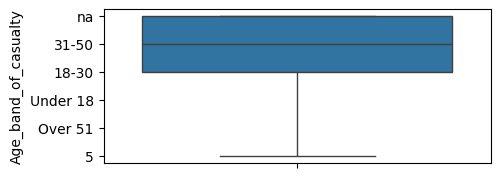

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 2))
sns.boxplot(df['Age_band_of_casualty'])
plt.show()

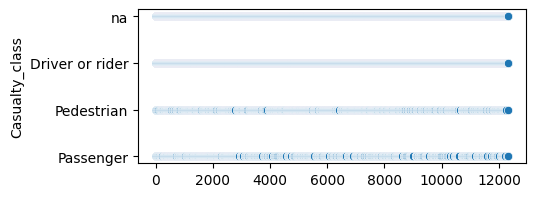

In [84]:
plt.figure(figsize=(5,2))
sns.scatterplot(df['Casualty_class'])
plt.title('')
plt.show()

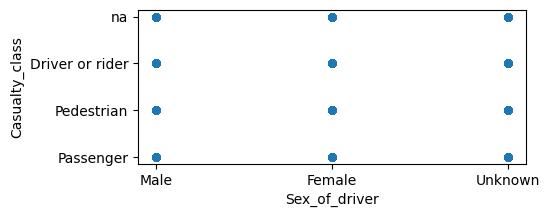

In [92]:
plt.figure(figsize=(5,2))
sns.scatterplot(x="Sex_of_driver", y="Casualty_class", sizes=(1, 8), linewidth=0, data=df);

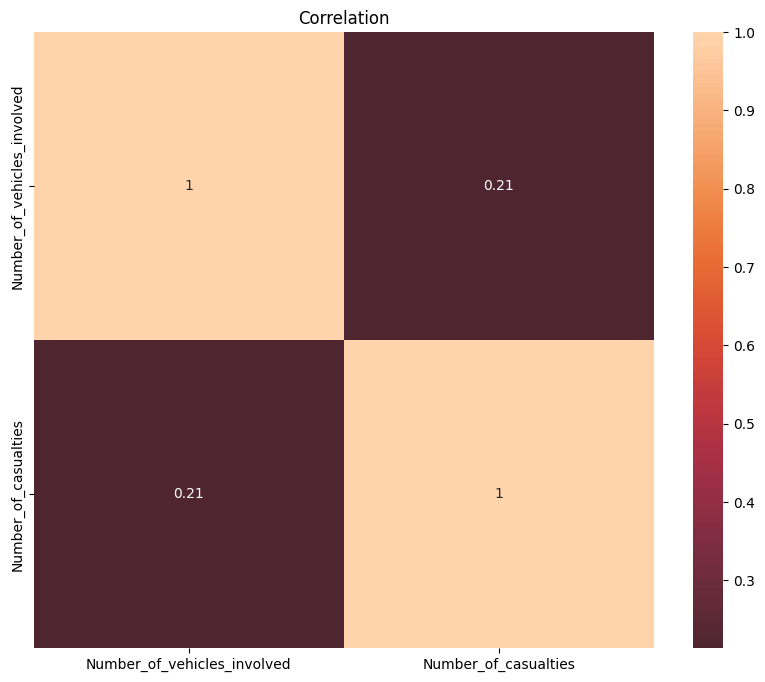

In [306]:
corr_mat = df[['Number_of_vehicles_involved', 'Number_of_casualties']].corr()

selected_col = ['Number_of_vehicles_involved', 'Number_of_casualties']
selected_corr_mat = corr_mat.loc[selected_col, selected_col]

plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_mat, annot=True, center=0)
plt.title('Correlation')
plt.show()

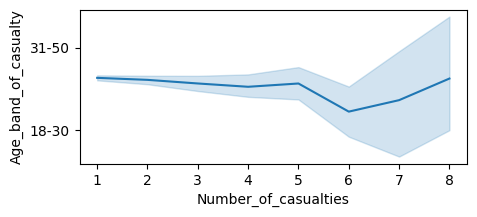

In [285]:
plt.figure(figsize=(5,2))
sns.lineplot(x="Number_of_casualties", y="Age_band_of_casualty",
             data=df)

plt.show()

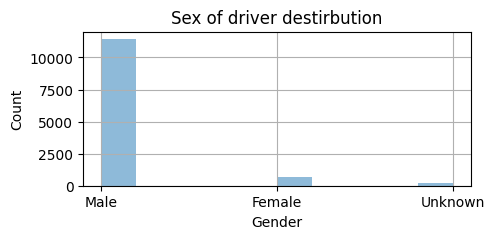

In [314]:
# Gender_counts = df['Sex_of_driver'].sum()

plt.figure(figsize=(5,2))
df['Sex_of_driver'].hist(alpha=0.5)
plt.title('Sex of driver destirbution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [318]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [319]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train )

LinearRegression()

#### Decision Tree Classifier

In [321]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(x, y)


DecisionTreeRegressor(max_depth=3, random_state=42)

#### Support Vector Machine (SVM)

In [320]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_reg.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, degree=2, kernel='poly')

#### K-Neighbors Classifier

In [324]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
from sklearn.metrics import recall_score_score

In [ ]:
from sklearn.metrics import f1_score

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: